## Final dataframe

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [4]:
df = pd.read_csv("/Users/datascienceuser/code/reneSalmon/fairjobs/raw_data/df_all_3108-20.csv")
df.head(3)

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender,indeed_review_score,clean_description,company culture,inclusion,flexibility,personal development,relevance score
0,0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,11,10,52.0,48.0,neutral,3.9,border patrol agents prevent terrorists terror...,20,20,20,20,20.0
1,1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,16,13,55.0,45.0,masculine,3.7,gap brands bridge gaps see world old navy demo...,60,60,20,40,45.0
2,2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,5,3,62.0,37.0,masculine,4.1,county san diego invites resumes position regi...,0,40,0,0,10.0


## Text for criteria description

### Company Culture

looks for occurences of the words 'support', 'collaboration', 'team', 'value', 'culture' and similar words in the job description

### Inclusion

looks for occurences of the words 'transparent', 'fair', 'inclusive', 'equal' and similar words in the job description

### Flexibility

looks for occurences of the words 'home', 'part time', 'flexible', 'balance', 'vacation' and similar words in the job description

### Personal Development

looks for occurences of the words 'grow', 'learn', 'train', 'coach', 'develop' and similar words

## Text for score descriptions

### Criteria Score 

shows percentage of occurence of the five keywords of the specific criteria, e.g. 4 of the keywords are included in the job description a score of 80% is shown

### Relevance Score

shows the product of each criteria score and its corresponding slider value divided by the sum of the slider values

### Gender Bias

shows if the majority of gender-coded words are female or masculine, a tie is categorized as neutral
as a fundament we used a gender decoder (see https://gender-decoder.katmatfield.com/about)

### Company Review Score

shows the company review score from indeed

## Data Analysis

In [11]:
df["indeed_review_score"].replace("-", np.nan, inplace=True)

In [12]:
df["indeed_review_score"]=df["indeed_review_score"].astype(float)

In [13]:
df.describe()

,Unnamed: 0,masc_words,fem_words,masc_coded,fem_coded,indeed_review_score,company culture,inclusion,flexibility,personal development,relevance score
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,2102.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,1559.500000,19.314103,14.821154,52.894872,45.766987,3.832303,45.570513,22.993590,11.641026,35.903846,29.027244
std,900.810746,16.303020,10.527391,19.004644,18.755490,0.535266,28.426652,21.007334,15.850354,24.309978,15.740997
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,779.750000,8.000000,8.000000,41.000000,33.000000,3.600000,20.000000,0.000000,0.000000,20.000000,20.000000
50%,1559.500000,15.000000,13.000000,54.000000,45.000000,3.900000,40.000000,20.000000,0.000000,40.000000,30.000000
75%,2339.250000,26.000000,20.000000,66.250000,58.000000,4.100000,60.000000,40.000000,20.000000,60.000000,40.000000
max,3119.000000,125.000000,116.000000,100.000000,100.000000,5.000000,100.000000,100.000000,80.000000,100.000000,75.000000


(array([101., 105., 342., 615., 620., 642., 401., 175.,  64.,  55.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

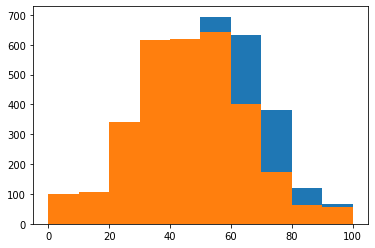

In [18]:
plt.hist(df['masc_coded'])
plt.hist(df['fem_coded'])

(array([ 14.,   0.,  15.,  16.,  49., 261., 631., 596., 416., 104.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

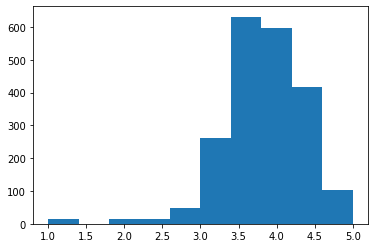

In [17]:
plt.hist(df['indeed_review_score'])

In [20]:
df[df["job_title"].str.contains("Data")][["job_title","company_name", "company culture", "inclusion", "flexibility", "personal development", "fem_words", "masc_words","masc_coded", "fem_coded","indeed_review_score", "relevance score"]].sort_values("masc_words", ascending=False).head(5)

,job_title,company_name,company culture,inclusion,flexibility,personal development,fem_words,masc_words,masc_coded,fem_coded,indeed_review_score,relevance score
894,Data Scientist,National Security Agency,60,20,20,60,22,120,85.0,15.0,NaN,40.0
1070,newData Analyst - Intermediate,UAMS Medical Center,80,20,20,60,30,94,76.0,24.0,3.9,45.0
1060,"Associate Director, Data Strategy and Democrat...",Abbvie,80,40,0,100,34,90,73.0,27.0,4.0,55.0
2693,newData Steward - Data Governance,Costco Wholesale,80,20,0,20,25,89,78.0,22.0,4.1,30.0
695,newSr. Data Engineer - TrueStage (Remote),CUNA Mutual Group,80,20,0,60,17,86,83.0,17.0,3.9,40.0


In [29]:
df[df["job_title"].str.contains("Data")][["job_title","company_name", "fem_words", "masc_words","masc_coded", "fem_coded","indeed_review_score", "relevance score"]].sort_values("masc_words", ascending=False).head(5)

,job_title,company_name,fem_words,masc_words,masc_coded,fem_coded,indeed_review_score,relevance score
894,Data Scientist,National Security Agency,22,120,85.0,15.0,NaN,40.0
1070,newData Analyst - Intermediate,UAMS Medical Center,30,94,76.0,24.0,3.9,45.0
1060,"Associate Director, Data Strategy and Democrat...",Abbvie,34,90,73.0,27.0,4.0,55.0
2693,newData Steward - Data Governance,Costco Wholesale,25,89,78.0,22.0,4.1,30.0
695,newSr. Data Engineer - TrueStage (Remote),CUNA Mutual Group,17,86,83.0,17.0,3.9,40.0


In [28]:
df[df["job_title"].str.contains("Data")][["job_title","company_name", "fem_words", "masc_words","masc_coded", "fem_coded","indeed_review_score", "relevance score"]].sort_values("fem_words", ascending=False).head(5)

,job_title,company_name,fem_words,masc_words,masc_coded,fem_coded,indeed_review_score,relevance score
1105,"Specialist, Data Support",Save the Children,58,46,44.0,56.0,4.1,50.0
2471,Knowledge Management Lawyer - US Data & Techno...,Latham & Watkins LLP,54,42,44.0,56.0,4.2,50.0
1013,Data Validator,Samaritan Ministries International,48,32,40.0,60.0,NaN,45.0
1178,"newSenior Specialist, Data Architect & Modeler",Save the Children,47,48,51.0,49.0,4.1,60.0
2955,Data Engineer,Liberty Mutual Insurance,44,71,62.0,38.0,3.6,55.0


## Story of the problem

Problem: It is time-consuming and sometimes even impossible to find a pool of jobs that fits my needs & wishes.
When I have found an interesting job offer, I often feel that it is not addressed to me because of the language and the used imagery.
Needs & wishes:
* company culture based on values like trust, collaboration and support
* inclusive environment that makes an effort to treat everyone the same, independent of gender, skin color, religion and sexual orientation, including a fair compensation
* flexibel working settings that make a work-life-balance possible
* a climate that promotes personal growth and learning opportunities

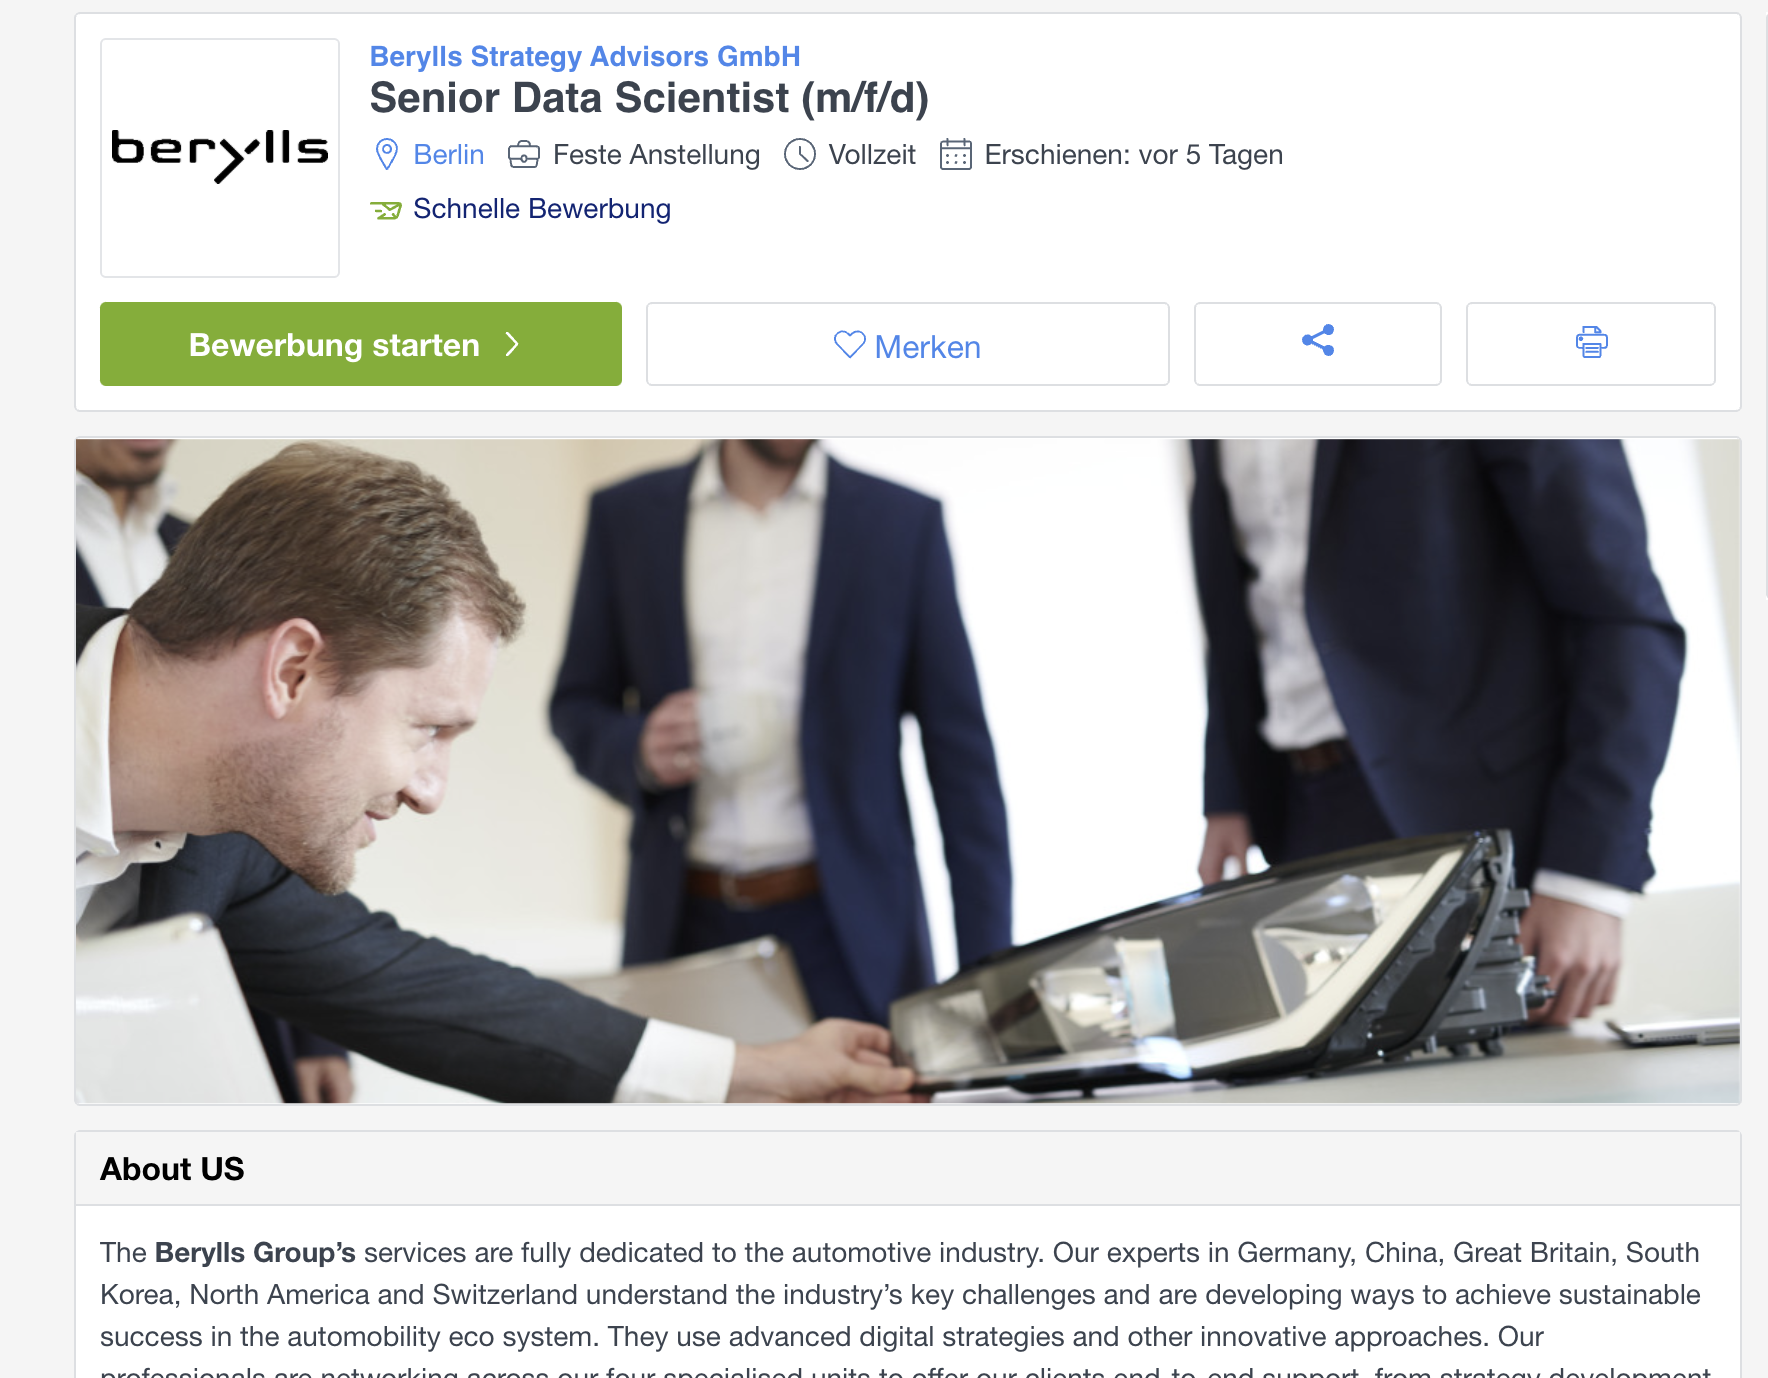

In [24]:
from IPython.display import Image
Image(filename='example1-maleimagery.png',width=800, height=400)

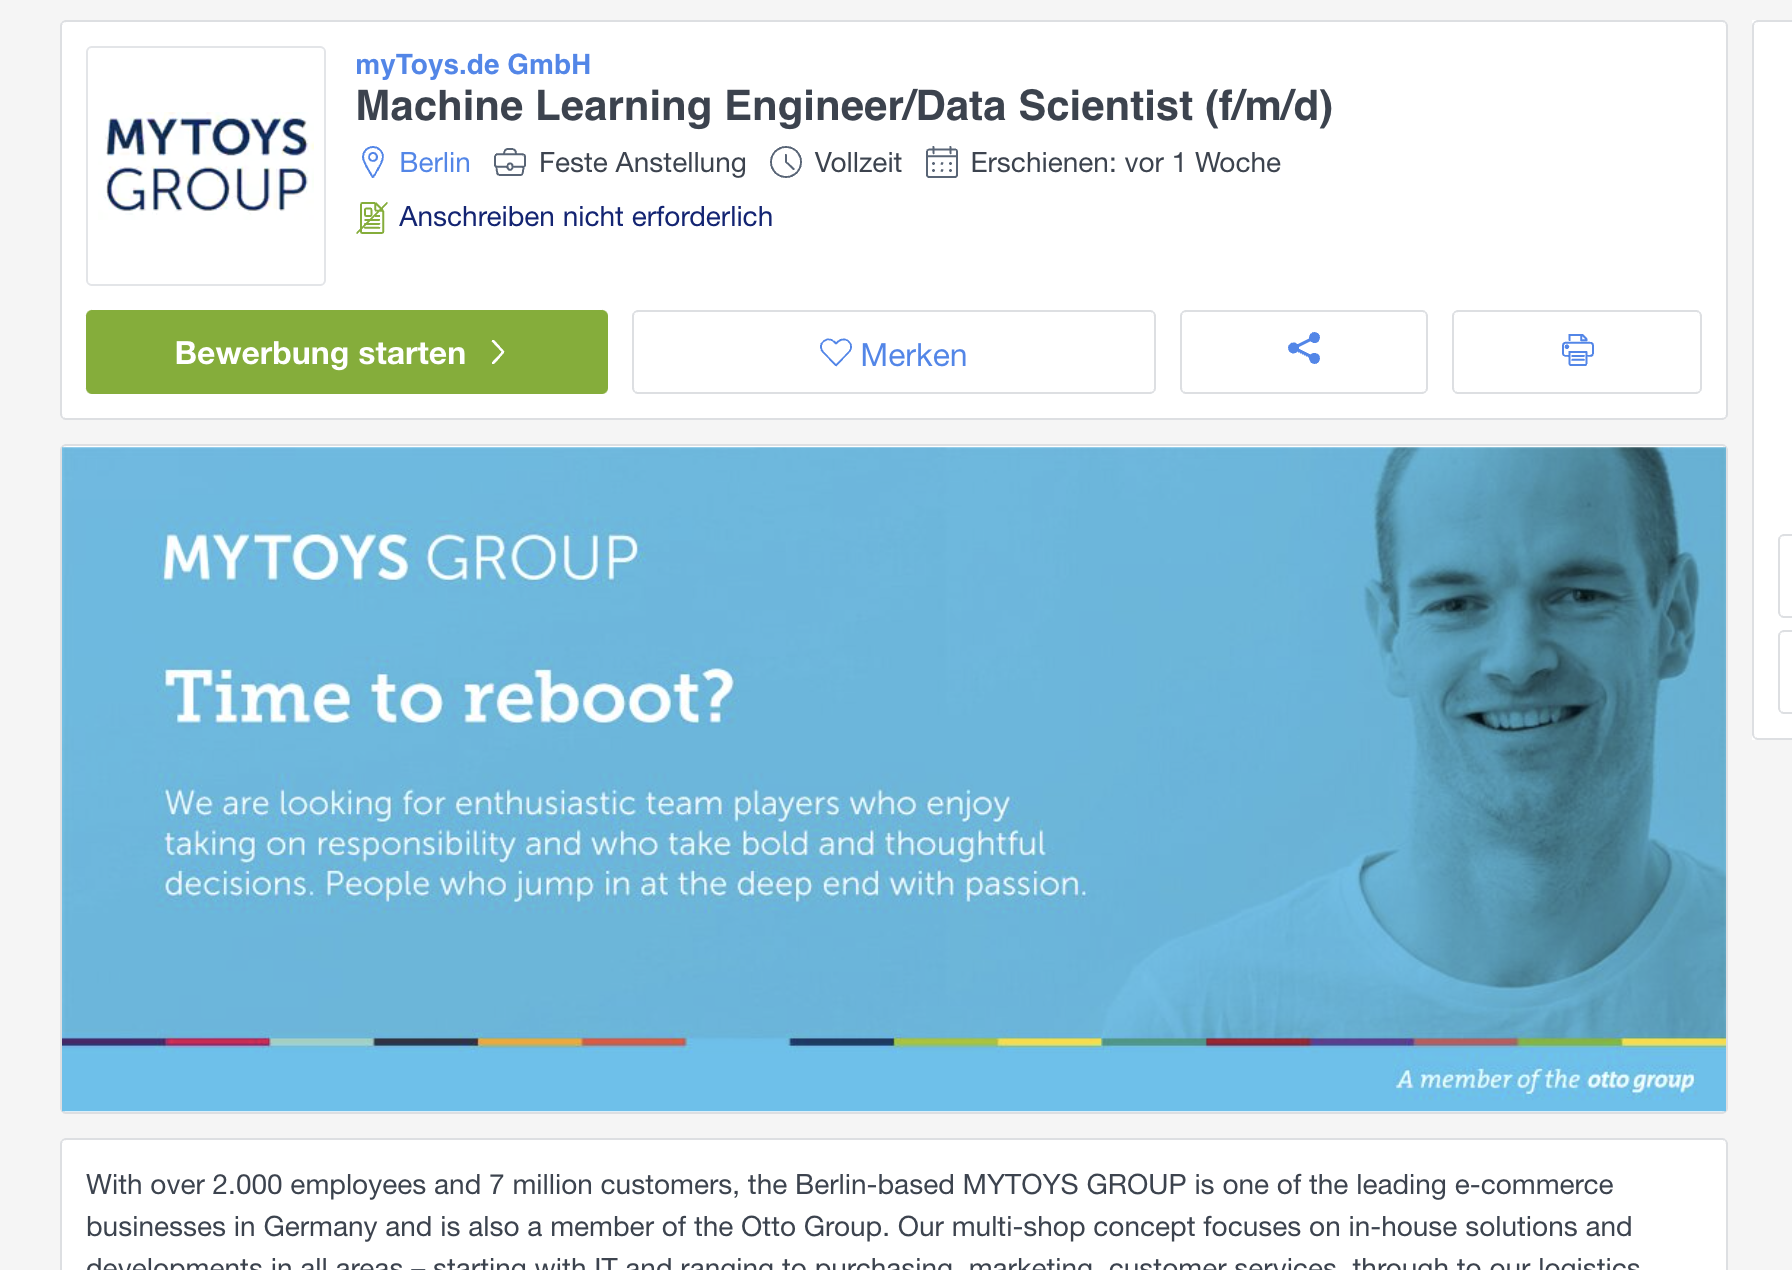

In [27]:
Image(filename='example2_maleimagery.png',width=800, height=400)